2022.01.17  Ver1.1

# main_code

注意事項  
- google_colabでは、新しいウィンドウを表示することが出来ないため、jpyter notebook等で実行してください。
- "_"を前につけてある関数等を書き換えると動作しなくなることがあるので、refarence等を読んでから書き換えるなどの操作をしてください。  
- Quit のボタンがありますがjupyter notebook だとwindow閉じることができずErrerが出ます、右上の✕で閉じてください。 Ubntu等からpythonで実行するときは使えます。
- 詳しくは公式[reference](#reference)を参照してください。

In [1]:
from tkinter import *
from tkinter import ttk
import tkinter.font
import cv2


#Style_Setting=======================================
Style = ttk.Style()
Style.configure("M1.TFrame",background = "#6ac9f4")
Style.configure("User.TFrame",background = "#c7f9fd")
Style.configure("UseFrame.TLabelframe",background = "#fff")#親要素
Style.configure("UseFrame.TLabelframe.Label",background="#fff",foreground="#000")#子要素
Style.configure("FS4.TFrame",background = "#ebebeb")

Style.configure("ttkS.TLabel",background ="black",foreground = "white" )
#========================================================

class _MainFrame(Frame):
    def __init__(self,master=None):
        Frame.__init__(self,master)
        
        self.master.minsize(width = 320,height = 180)
        self.grid(sticky=N+S+E+W)
        self.name = StringVar()
        
        self.name = "Video_capture"#windowの名前
        #instances=====================================
        #==============================================
        self._MainSet()
        self._SetWidgets()
        
    def _SetWidgets(self):
        #define_widgets=========================================
        self._MakeFrame("main")
        
        #self.main.REC = Button(self.main,text = lambda self.REC_status : )
        #=======================================================
        
    def _MainSet(self):
        Top=self.winfo_toplevel()
        Top.configure(bg="")
        Top.grid_columnconfigure(0,weight=1)
        Top.grid_rowconfigure(2,weight=1)
        self.H1 = ttk.Frame(Top,padding=4)
        self.H1.grid(row=0,sticky=N+E+W+S)
        
        self.H1.grid_columnconfigure(0, weight=0)
        self.H1.grid_columnconfigure(1, weight=1)
        self.H1.grid_columnconfigure(2, weight=0)
        
        Name_Font = tkinter.font.Font(family = "Menlo",size = 16,weight = tkinter.font.BOLD)
        self.H1.Name = Label(self.H1,text = self.name,font = Name_Font).grid(row=0,column=0, sticky=E)
        self.H1.Text = Label(self.H1,text = "label",font = tkinter.font.Font(size = 10)).grid(row=0,column=1, sticky=W)
        
        self.M1 = ttk.Frame(Top,style = "M1.TFrame")
        self.M1.grid(row = 1,sticky=N+E+W+S)
        self.M1.count = 0
        
        self.UserFrame = ttk.Frame(Top,padding = [5,0],style ="User.TFrame" )
        self.UserFrame.grid(row = 2,column = 0,sticky = N+E+W+S)
        self.UserFrame.grid_rowconfigure(0, weight=1)
        self.UserFrame.grid_columnconfigure(0, weight=1)

    def _MakeFrame(self,name):
        self._OffPalse()
        code0 = "self."+ name + "= ttk.LabelFrame(self.UserFrame,style=\"UseFrame.TLabelframe\",text=\""+name+"\",padding=[0,5],relief=\"flat\")"
        code1 = "self."+ name + ".grid(row=0,column=0,sticky = N+E+W+S)"
        exec(code0)
        exec(code1)
        self._M1button(name)
    def _M1button(self,Frame):
        code0 = "self.M1."+Frame+"=Button(self.M1,text="+"\""+Frame+"\",command = self._combineFunc(self._OffPalse,self."+Frame+".grid))"
        code1 = "self.M1."+Frame+".grid(row = 0,column="+str(self.M1.count)+")"
        code2 = "self.M1."+Frame+".column="+str(self.M1.count)
        code3 = "self.M1."+Frame+".state=\"Appear\""
        code4 = "self.M1."+Frame+".freame=\"self.UserFrame."+Frame+"\""
        exec(code0)
        exec(code1)
        exec(code2)
        exec(code3)
        exec(code4)
        self.M1.count += 1
    def _OffPalse(self):
        widgetlist = self.UserFrame.grid_slaves()
        for wid in widgetlist:
            wid.grid_remove()
    def _combineFunc(self, *funcs):
       def combinedFunc(*args, **kwargs):
            for f in funcs:
                f(*args, **kwargs)
       return combinedFunc
    #User_commands1===================================
    
    #================================================


#User_commands2===================================

#================================================

_app = _MainFrame()
_app.master.title(_app.name)
_app.mainloop()

# Frameを作成する関数　_MakeFrame

基本構文  
self._MakeFrame("name")

name につけたい名前を入れるとそのフレームが作成される。(名前は基本何でもよいが、漢字、ひらがななどの全角文字(対応しているが使えない文字があるかも)、また、トークンとかぶると誤動作する可能性があります。)  
フレームの上に呼び出す用のボタンが作成される。

define_widgetsのところに書く、ここで定義するフレームに対してwidget(button や textなど)を紐づけていく。

In [ ]:
        self._MakeFrame("sample")

In [ ]:
# -*- coding:utf-8 -*-
# python


from tkinter import *
from tkinter import ttk

import tkinter
from tkinter import filedialog
import tkinter.font
import cv2
import PIL.Image, PIL.ImageTk
from threading import Thread, enumerate
from multiprocessing import Process, Manager
import os
import datetime
import sys



#Style_Setting=======================================
Style = ttk.Style()
Style.configure("M1.TFrame",background = "#6ac9f4")
Style.configure("User.TFrame",background = "#c7f9fd")
Style.configure("UseFrame.TLabelframe",background = "#fff")#親要素
Style.configure("UseFrame.TLabelframe.Label",background="#fff",foreground="#000")#子要素
Style.configure("FS4.TFrame",background = "#ebebeb")

Style.configure("mainLabel.TLabel",background = "#fff")

Style.configure("ttkS.TLabel",background ="#fff",foreground = "#000" )
#========================================================


class _MainFrame(Frame):
    def __init__(self,dic,master=None):
        Frame.__init__(self,master)
        
        #self.master.minsize(width = 320,height = 180)
        self.grid(sticky=N+S+E+W)
        self.name = "Video_capture"
        self.ver = "ver 0.0"
        #instances=====================================
        self.dic = dic
        self.Outfilepath = StringVar()
        self.Outfilenamebace = StringVar()
        self.RecSpan = IntVar()
        self.RecSpan.set(5)
        self.Status = {"Camera" : False,#capture state
                       "REC_mode":0,#REC mode (0:Free,1:game)
                       "FPS" : 0}
        
        self.Video_State = False # makevideo state (0:not make,1:making)
        self.Video_source = int(0) #Video source (0,1,..)
        self.delay = 15 #ms/Frame of display
        
        self.StatusLabel = StringVar()
        self.Update()
        
        
        self._MainSet()
        self._SetWidgets()
        
        
    def dic_set(self):
        self.dic["output_Path"] = self.Outfilepath.get()
        self.dic["output_NameBace"] = self.Outfilenamebace.get()
        self.dic["cam_Port"] = self.Video_source
        self.dic["config_Fps"] = 30.0
        self.dic["fps"] = None
        self.dic["cap_Mode"] = 0
        self.dic["cap_TimeSpan"] = self.RecSpan.get()
        self.dic["rec_type"] = 1
        
        
    def _SetWidgets(self):
        #define_widgets=========================================
        self._MakeFrame("main")
        
        try:
            self.video = MyVideoCapture(self.Video_source)
            self.Status["Camera"] = True
        except:
            self.Status["Camera"] = False
        
        self.main.columnconfigure(0,minsize=100)
        try:
            self.main.C1 = tkinter.Canvas(self.main,width = self.video.width,height = self.video.height)
            self.main.columnconfigure(1,minsize=self.video.width)
        except:
            self.main.C1 = tkinter.Canvas(self.main,width = 640,height =360)
            self.main.columnconfigure(1,minsize=640)
            
        self.main.C1.grid(row = 0,column=1,rowspan = 3,sticky = N+E+S+W)
        
        self.main.L1 = ttk.Label(self.main,style = "mainLabel.TLabel",textvariable=self.StatusLabel)
        self.main.L1.grid(row = 0,column=0,sticky = N)
        
        self.main.B1 = Button(self.main,text = "Start",command =self.start)
        self.main.B1.grid(row = 1,column=0,sticky = N+E+W,padx=20,pady=5)
        self.main.B2 = Button(self.main,text = "Stop",command =self._combineFunc(self.stop,self.update))
        self.main.B2.grid(row = 1,column=0,sticky = N+E+W,padx=20,pady=5)
        
        
        self.main.B2.grid_remove()

        self.update()
        
        
        self._MakeFrame("Settings")
        
        self.Settings.F1 = ttk.LabelFrame(self.Settings,style = "UseFrame.TLabelframe",text = "Video setting")
        self.Settings.F2 = ttk.LabelFrame(self.Settings,style = "UseFrame.TLabelframe",text = "option")
        
        self.Settings.F1.grid(row = 0,column = 0,sticky = N+E+W+S)
        self.Settings.F2.grid(row = 0,column = 1,sticky = N+E+W+S)
        
        self.Settings.F1.L0 = Label(self.Settings.F1,text = "Camera port",bg = "#FFF").grid(row=0,column=0)
        self.Settings.F1.CBB0 = ttk.Combobox(self.Settings.F1, value =[0,1])
        self.Settings.F1.CBB0.grid(row = 0,column = 1)
        self.Settings.F1.CBB0.set(0)
        self.Settings.F1.L1 = ttk.Label(self.Settings.F1,text ="OutputFilePath",style = "ttkS.TLabel" ).grid(row=1,column=0)
        self.Settings.F1.B1Out = ttk.Button(self.Settings.F1,text ="GetPath",command =self.GetFolderPath).grid(row=1,column=1,sticky=N+W+E+S)
        self.Settings.F1.E2Out = ttk.Entry(self.Settings.F1,textvariable=self.Outfilepath).grid(row = 2,column = 0,columnspan = 2,sticky=N+W+E+S)
        self.Settings.F1.L3 = ttk.Label(self.Settings.F1,text ="OutputFileNameBace").grid(row =3,column = 0)    
        self.Settings.F1.E3Out = ttk.Entry(self.Settings.F1,textvariable=self.Outfilenamebace).grid(row = 3,column = 1,sticky=N+W+E+S)
        self.Settings.F1.L4 = ttk.Label(self.Settings.F1,text ="RecSpan",style = "ttkS.TLabel" ).grid(row=4,column=0)
        self.Settings.F1.E4RM = ttk.Entry(self.Settings.F1,textvariable=self.RecSpan).grid(row = 4,column = 1,sticky=N+W+E+S)
        
        self.Settings.F1.B10 = ttk.Button(self.Settings.F1,text ="Apply Setting",command =self.ApplySettings).grid(row = 10,column = 1,sticky=N+E+S,padx=10,pady = 4)
        
        self.Settings.F2.L1at = Label(self.Settings.F2,text = "Auto Stop",bg = "#FFF").grid(row=0,column=0)
        self.Settings.F2.CBat = Checkbutton(self.Settings.F2,bg = "#FFF",activebackground = "#FFF",text ="※unprepared")
        self.Settings.F2.CBat.grid(row=0,column=1, sticky=W)
    
    def Update_Label(self):
        self.StatusLabel.set("Camera port:"+str(self.Video_source)+
                             "\nCamera:"+(lambda Bool: "ON"if Bool else "OFF")(self.Status["Camera"])+
                             "\nMode:"+(lambda x: "Free Shot"if x==0 else "Game")(self.Status["REC_mode"]))


    def ApplySettings(self):
        if self.Video_source != int(self.Settings.F1.CBB0.get()):
            try:
                self.video = MyVideoCapture(self.Video_source)
            except:
                pass
        self.Video_source = int(self.Settings.F1.CBB0.get())
        self.Update_Label()
        self.dic_set()
        #=======================================================
        
    def _MainSet(self):
        Top=self.winfo_toplevel()
        
        Top.configure(bg="")
        Top.grid_columnconfigure(0,weight=1)
        Top.grid_rowconfigure(2,weight=1)
        self.H1 = ttk.Frame(Top,padding=4)
        self.H1.grid(row=0,sticky=N+E+W+S)
        
        self.H1.grid_columnconfigure(0, weight=0)
        self.H1.grid_columnconfigure(1, weight=1)
        self.H1.grid_columnconfigure(2, weight=0)
        
        Name_Font = tkinter.font.Font(family = "Menlo",size = 16,weight = tkinter.font.BOLD)
        self.H1.Name = Label(self.H1,text = self.name,font = Name_Font).grid(row=0,column=0, sticky=E)
        self.H1.Text = Label(self.H1,text = self.ver,font = tkinter.font.Font(size = 10)).grid(row=0,column=1, sticky=W)
        self.H1.Quitbutton = Button(self.H1,text="Quit",command = self.quit).grid(row=0,column=2, sticky=W)
        
        self.M1 = ttk.Frame(Top,style = "M1.TFrame")
        self.M1.grid(row = 1,sticky=N+E+W+S)
        self.M1.count = 0
        
        self.UserFrame = ttk.Frame(Top,padding = [5,0],style ="User.TFrame" )
        self.UserFrame.grid(row = 2,column = 0,sticky = N+E+W+S)
        self.UserFrame.grid_rowconfigure(0, weight=1)
        self.UserFrame.grid_columnconfigure(0, weight=1)
        


    def _MakeFrame(self,name):
        self._OffPalse()
        code0 = "self."+ name + "= ttk.LabelFrame(self.UserFrame,style=\"UseFrame.TLabelframe\",text=\""+name+"\",padding=[0,5],relief=\"flat\")"
        code1 = "self."+ name + ".grid(row=0,column=0,sticky = N+E+W+S)"
        exec(code0)
        exec(code1)
        self._M1button(name)
    def _M1button(self,Frame):
        code0 = "self.M1."+Frame+"=Button(self.M1,text="+"\""+Frame+"\",command = self._combineFunc(self._OffPalse,self."+Frame+".grid))"
        code1 = "self.M1."+Frame+".grid(row = 0,column="+str(self.M1.count)+")"
        code2 = "self.M1."+Frame+".column="+str(self.M1.count)
        code3 = "self.M1."+Frame+".state=\"Appear\""
        code4 = "self.M1."+Frame+".freame=\"self.UserFrame."+Frame+"\""
        exec(code0)
        exec(code1)
        exec(code2)
        exec(code3)
        exec(code4)
        self.M1.count += 1
    def _OffPalse(self):
        widgetlist = self.UserFrame.grid_slaves()
        for wid in widgetlist:
            wid.grid_remove()
    def _combineFunc(self, *funcs):
       def combinedFunc(*args, **kwargs):
            for f in funcs:
                f(*args, **kwargs)
       return combinedFunc
    #User_commands1===================================
    def start(self):
        self.Video_State = True
        self.dic["rec_state"] = self.Video_State
        self.video.release()
        self.main.B1.grid_remove()
        self.main.B2.grid()
        
        
        self.main.C1.grid_forget()
        self.main.C1 = tkinter.Canvas(self.main,width = 640,height =360)
        self.main.columnconfigure(1,minsize=640)
        self.main.C1.grid(row = 0,column=1,rowspan = 3,sticky = N+E+S+W)
        
    def stop(self):
        self.Video_State = False
        self.dic["rec_state"] = self.Video_State
        self.main.B2.grid_remove()
        self.main.B1.grid()
        
        print("mount")
        self.video = MyVideoCapture(self.Video_source)
        self.main.C1.grid_forget()
        self.main.C1 = tkinter.Canvas(self.main,width = self.video.width,height = self.video.height)
        self.main.columnconfigure(1,minsize=self.video.width)
        self.main.C1.grid(row = 0,column=1,rowspan = 3,sticky = N+E+S+W)


    def update(self):
        # Get a frame from the video source
        try:
            ret, frame = self.video.get_frame()

            if ret:
                self.photo = PIL.ImageTk.PhotoImage(image = PIL.Image.fromarray(frame))
                self.main.C1.create_image(0, 0, image = self.photo, anchor = tkinter.NW)
                self.Update_Label()

            self.after(self.delay, self.update)
        except:
            pass
    def GetFilePath(self):
        typ = [('', '*')]
        current_dir = 'C:\\pg'
        fle = filedialog.askopenfilenames(filetypes = typ, initialdir = current_dir)
        
    def GetFolderPath(self):
        current_dir = 'C:\\pg'
        self.Outfilepath.set(filedialog.askdirectory(initialdir=current_dir))
    #================================================



#User_commands2===================================
class MyVideoCapture:#capture to UI
    def __init__(self, video_source):
        # Open the video source
        self.vid = cv2.VideoCapture(video_source)
        if not self.vid.isOpened():
            raise ValueError("Unable to open video source", video_source)

        # Get video source width and height
        self.width = self.vid.get(cv2.CAP_PROP_FRAME_WIDTH)
        self.height = self.vid.get(cv2.CAP_PROP_FRAME_HEIGHT)

    def get_frame(self):
        print("\r",self.vid.isOpened(),end="")
        if self.vid.isOpened():
            ret, frame = self.vid.read()
            if ret:
                # Return a boolean success flag and the current frame converted to BGR
                return (ret, cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            else:
                return (ret, None)
        else:
            return (ret, None)
    def release(self):
        self.vid.release()
    # Release the video source when the object is destroyed
    def __del__(self):
        try:
            if self.vid.isOpened():
                self.vid.release()
        except:
            pass

class Video_maker():
    def __init__(self,dic):
        self.cap = cv2.VideoCapture(dic["cam_Port"])
        self.filepath = make_name(directry=dic["output_Path"],bace=dic["output_NameBace"])
                

        self.w = int(self.cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        self.h = int(self.cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        
        if dic["config_Fps"] == None:
            self.fps = int(self.cap.get(cv2.CAP_PROP_FPS)) # フレームレート
        else:
            self.fps = int(dic["config_Fps"])
            
        self.codec = cv2.VideoWriter_fourcc(*'mp4v')
        self.video = cv2.VideoWriter(self.filepath, self.codec, self.fps, (self.w, self.h))
        
        self.rec_type = dic["rec_type"]
        if self.rec_type == 1:
            self.health = int(self.fps)*dic["cap_TimeSpan"]*60
        else:
            self.health = None
        self.life = True
        self.video_life = True
        self.dic = dic
        
    def write(self):
        self.live()
        if self.life:
            ret, img = self.cap.read()
            if ret:
                self.video.write(img)
            else:
                print('Error: capture is failed', file=sys.stderr)
            get_stutas()
        else:
            self.end()
    def get_stutas():
        try:
            self.dic["fps"] = self.cap.get(cv2.CAP_PROP_FPS)
        except:
            self.dic["fps"] = "Not Captured"
    def live(self):
        if self.rec_type == 1:
            self.health -= 1
            if self.health <= 0:
                self.life = False
    def kill(self):
        self.life = False
        self.end()
    def end(self):
        if self.video_life:
            self.video.release()
            self.cap.release()
            self.video_life = False

def make_name(directry="./",bace=""):
    dt = datetime.datetime.today()

    if bace == "":
        name = f'{dt.hour:_>2}_{dt.minute:_>2}_{dt.second:_>2}.mp4'
    else:
        name = f'{bace}_{dt.hour:_>2}_{dt.minute:_>2}_{dt.second:_>2}.mp4'
    
    if directry == "./":
        name = f'{directry}{name}'
    else:
        name = f'{directry}/{name}'
    print(name)
    return name




def cv_main(dic):
    while(True):
        print("\r",dic,end="")
        if dic["rec_state"]:
            REC = Video_maker(dic)
            while True:
                if dic["rec_state"]:
                    print("\rrec now",end="")
                    REC.write()
                else:
                    REC.kill()

                if not REC.life:
                    print("\nrec end")
                    break


#================================================

    
def tk_main(dic):
    _app = _MainFrame(dic)
    _app.master.title(_app.name)
    _app.mainloop()


    
if __name__ == '__main__':
    with Manager() as manager:
        shared_dict = manager.dict()

        shared_dict["output_Path"] = "./"
        shared_dict["output_NameBace"] = "test"
        shared_dict["cam_Port"] = 0
        shared_dict["config_Fps"] = 30.0
        shared_dict["cap_TimeSpan"] = 5
        shared_dict["rec_type"] = 1
        shared_dict["rec_state"] = False
        shared_dict["cap"] = False,None

        Process1 = Process(target=tk_main,args =(shared_dict,))
        Process2 = Process(target=cv_main,args =(shared_dict,))

        Process1.start()
        Process2.start()
        Process1.join()
        Process2.join()

複数作成したときは、フレーム名のついたボタンをおせば呼び出せます。コマンドで呼び出すことも出来ます（便利関数例　Switch_Frame）

# widgetのサンプルを幾つか例示する。

- *1 はstyle_settingのところに張り付けると利用できる
- *2 はdefine_widgetsのところに張り付ける。
- *3 はUser_commands1のところに張り付ける。_MainFrame内の値を使う関数はここに書く方が扱いやすいと思います。(自分が利用したい関数などもここに書く)
- *4 はUser_commands2のところに張り付ける。(自分が利用したい関数などもここに書く)
- より詳しいoption等は、[reference](#reference)を参照してください。

## Button

基本構文  
w = Button(parent,option = "val",...)

主なoption

|option名|例文|説明等|
|-|-|-|
|text|text = "text"||
|command|command =func |ボタンを押したとき実行する関数を設定する。この時、ここで設定するのは、実行する関数、"command = func()"のようにすると、ここで関数が実行され、その値が呼び出される関数になる。関数に引数を与えたい場合は、class化するなどする必要がある。


"sample"という名前のフレームを作成し、そこに"Button1"を作成、その後"sample"の一行(row=0)一列目(column=0)に配置する。

*2

In [ ]:
        self._MakeFrame("sample")
        self.sample.Button1 = Button(self.sample,text="test",command=test)
        self.sample.Button1.grid(row=0,column=0)

*4

In [ ]:
def test():
    print("test")

### 複数の関数を呼び出したいとき

実行順序はfunc1 -> func2の順になる。

In [ ]:
command=self._combineFunc(func1,func2)

## text

基本構文  
w = Label(parent,option = "val",...)

主なoption

|option名|例文|説明等|
|-|-|-|
|text|text = "text"|文字表示|
|textvariable|textvariable =text |textvariableは"StringVar"で定義する。  textvariableの中身を決定するときは、w.set()、中身を取り出すときはx.get()で取り出せる。|

*2

In [ ]:
        self._MakeFrame("sample")
        self.sample.Label1 = Label(self.sample,text="test",command=test)
        self.sample.Label1.grid(row=0,column=0)

## Entry

基本構文  
w = Entry(parent,option = "val",...)

主なoption

|option名|例文|説明等|
|-|-|-|
|text|text = "text"||
|textvariable|textvariable =text |textvariableは"StringVar"で定義する。  textvariableの中身を決定するときは、w.set()、中身を取り出すときはx.get()で取り出せる。|


instanceにself.textを追加、StringVar()で定義しておく。

In [ ]:
        self.text = StringVar()

*2

In [ ]:
        self._MakeFrame("sample")
        self.sample.Entry1 = Entry(self.sample,textvariable=self.text,command=test)
        self.sample.Entry1.grid(row=0,column=0)
        
        #取得できたかどうかの確認用のButtan
        self.sample.Button2 = Button(self.sample,textvariable=self.text,command=self.textprint)
        self.sample.Button2.grid(row=0,column=1)

*3

In [25]:
def textprint(self):
    print(self.sample.Entry1.get())

### Entryにスクロールバーをつけたいとき

*2

In [ ]:
        self.sample.entryScroll = Scrollbar(self.sample, orient=HORIZONTAL,command=self.__scrollHandler)
        self.sample.entryScroll.grid(row=1,column=0, sticky=E+W)#Entryの下に配置する。
        self.sample.Entry1['xscrollcommand'] = self.sample.entryScroll.set

*3

In [ ]:
    def __scrollHandler(self, *L):
        op, howMany = L[0], L[1]
        if op == 'scroll':
            units = L[2]
            self.sample.Entry1.xview_scroll(howMany, units)
        elif op == 'moveto':
            self.sample.Entry1.xview_moveto(howMany)

## Checkbutton

基本構文  
w = Checkbutton(parent, option=val, ...)  

w.get()及びw.set()で"True","False"のブール値を取得及び設定できる。  
w.select()でon状態にできる。  
w.toggle()でon,off状態を切り替えれる。

主なoption

|option名|例文|説明等|
|-|-|-|
|text|text = "text"|文字表示|
|command|command=func|クリックしたときに呼び出す関数|

*2

In [ ]:
        self._MakeFrame("sample")
        self.sample.CB = Checkbutton(self.sample, text = "on",command=test)
        self.sample.CB.grid(row=1,column=0, sticky=E+W)

*4

In [ ]:
def test():
    print("test")

## Frame

widgetの入れ物となれるもの、主にwidgetをまとめるときに用いる。あくまで枠なので、中身を設定しないと描画されない。

w = Frame(parent,option=val,...)

*2

In [ ]:
        self._MakeFrame("sample")
        self.sample.F = Frame(self.sample,bg="#E1ECF4")
        self.sample.F.grid(row=1,column=0, sticky=E+W)
        
        #中身
        self.T1 = Label(self.sample.F,text="sample").grid(row=0,column=0)
        self.B1 = Button(self.sample.F,text="button").grid(row=0,column=1,padx=10,pady=5)
        self.E1 = Entry(self.sample.F).grid(row=1,column=0)

##  Listbox widget

文字の配列を表示できる。標準では10個まででそれ以上を表示する場合は、改変が必要。

In [ ]:
        self._MakeFrame("sample")
        self.sample.LB = Listbox(self.sample,bg="#E1ECF4")
        self.sample.LB.insert(1,"test","pre","experiment") #intert(index,"label","label2",,,,)でラベルを追加する。
        self.sample.LB.grid(row=1,column=0, sticky=E+W)


項目の追加

In [ ]:
self.sample.LB.insert(1,"test","pre","experiment") #intert(index,"label","label2",,,,)でラベルを追加する。

項目の削除  
index firstからlastのインデックスまで削除する。
二項目に   tkinter.END  または、  last=None   と書き込めば最後まで消せる。

In [ ]:
self.sample.LB.delete(first, last=None)

選択の解除  
firstからlastまでのインデックスのコードを選択解除できる。
”last=”の項目を書き込まなければ、firstの項目を選択することが出来る。

In [ ]:
self.sample.LB.select_clear(first, last=None)

以下、必要があれば追記します。

## Menu widget

ドロップダウンメニューの作成

w = Menu(mb, option, ...)

##  Top-level menus

windowの上側に表示されるメニュー欄などの設定

In [ ]:
top = self.winfo_toplevel()
self.menuBar = tk.Menu(top)
top['menu'] = self.menuBar
self.subMenu = tk.Menu(self.menuBar)
self.menuBar.add_cascade(label='Help', menu=self.subMenu)
self.subMenu.add_command(label='About', command=self.__aboutHandler)

## Menubutton

In [ ]:
w = Menubutton(parent, option, ...)

In [ ]:
self.mb = tk.Menubutton(self, text='condiments',
relief=RAISED)
self.mb.grid()
self.mb.menu = tk.Menu(self.mb, tearoff=0)
self.mb['menu'] = self.mb.menu
self.mayoVar = tk.IntVar()
self.ketchVar = tk.IntVar()
self.mb.menu.add_checkbutton(label='mayo',
variable=self.mayoVar)
self.mb.menu.add_checkbutton(label='ketchup',
variable=self.ketchVar)

## The Message widget

メッセージウィンドウを表示する。

In [ ]:
w = Message(parent, option, ...)

##  The PanedWindow widget

In [ ]:
w = PanedWindow(parent, option, ...)

## The Scale widget

可変ボリュームの作成

In [ ]:
w = Scale(parent, option, ...)

# 便利関数例

## Switch_Frame フレームの切り替え関数

呼び出したいフレームの名前を引数に与えれば、そのフレーム(_MakeFrameで作ったフレーム)を呼び出すことが出来る。

*3

In [ ]:
    def Switch_Frame(self.Frame):
        self._OffPalse
        code0 = "self."+Frame+".grid"
        exec(code0)
    #buttonのcommandでは引数を与えられないのでbuttanで使うときは、それぞれ以下のような関数を作成して呼び出してください。  
    def callF1(self):
        Switch_Frame("F1")

使用例

初めにsampleのフレームを表示し、ボタンが押されるとF1に切り替わる。

*2

In [ ]:
        self._MakeFrame("sample")
        self._MakeFrame("F1")
        self.Switch_Frame("sample")
        
        self.sample.B = Button(self.sample,text = "apper F1",command=self.callF1)
        self.sample.B.grid(row=0,column=0)
        self.F1.B = Button(self.F1,text = "apper sample",command=self.callsample)
        self.F1.B.grid(row=0,column=0)

*3

In [ ]:
    def Switch_Frame(self,Frame):
        #self._OffPalse()
        code0 = "self."+Frame+".grid()"
        exec(code0)
        
    def callF1(self):
        self.Switch_Frame("F1")
    def callsample(self):
        self.Switch_Frame("sample")

_MakeFrame のself._M1button(name)を以下のようにコメントアウトすれば、動作チェック用のボタンの表示を消せます。

In [ ]:
    def _MakeFrame(self,name):
        self._OffPalse()
        code0 = "self."+ name + "= ttk.LabelFrame(self.UserFrame,style=\"UseFrame.TLabelframe\",text=\""+name+"\",padding=[0,5],relief=\"flat\")"
        code1 = "self."+ name + ".grid(row=0,column=0,sticky = N+E+W+S)"
        exec(code0)
        exec(code1)
        #self._M1button(name)

## ディレクトリパスの取得用ボタン及びエントリー

ボタンを押せばファイルダイアログを表示でき、パスを取得できます。(self.path1に)

In [ ]:
import os,sys
from tkinter import filedialog

instans

In [ ]:
        self.path1 = StringVar()

2*

In [ ]:
self.sample.B2 = Button(self.sample,text = "pathdir",command = self.dirdialog_clicked).grid(row = 1,column=0)

4*

In [1]:
    def dirdialog_clicked(self):
        iDir = os.path.abspath(os.path.dirname(__file__))
        iDirPath = filedialog.askdirectry(initialdir = iDir)
        self.path1 = iDirPath

※__file__をjpyter notebook上で呼び出そうとするとエラーが出ます。実機上では大丈夫なはずです。

## ファイルパスの取得

押せばファイルダイアログを表示でき、ファイルパスを取得できます。(self.path1に)

In [3]:
import os,sys
from tkinter import filedialog

instance

値の保持用の変数

In [ ]:
self.path1 = StringVar()

2*

In [ ]:
self.sample.B2 = Button(self.sample,text = "pathdir",command = self.dirdialog_clicked).grid(row = 1,column=0)

4*

In [ ]:
    def filedialog_clicked(self):
        fType = [("","*")]
        iFile = os.path.abspath(os.path.dirname(__file__))
        iFilePath = filedialog.askopenfilename(filetype = fType,initialdir = iFile)
        self.path1 = iFilePathe

## usbカメラの映像を表示する。

動画を取るときは、キャプチャのマウントの関係で、サブプロセスで回すなり、工夫が必要になる。

In [ ]:
        self.video = MyVideoCapture(self.Video_source)
    
        self.main.C1 = tkinter.Canvas(self.main,width = self.video.width,height = self.video.height)
        self.main.columnconfigure(1,minsize=self.video.width)
            
        self.main.C1.grid(row = 0,column=1,rowspan = 3,sticky = N+E+S+W)

In [ ]:
#User_commands2===================================
class MyVideoCapture:#capture to UI
    def __init__(self, video_source):
        # Open the video source
        self.vid = cv2.VideoCapture(video_source)
        if not self.vid.isOpened():
            raise ValueError("Unable to open video source", video_source)

        # Get video source width and height
        self.width = self.vid.get(cv2.CAP_PROP_FRAME_WIDTH)
        self.height = self.vid.get(cv2.CAP_PROP_FRAME_HEIGHT)

    def get_frame(self):
        print("\r",self.vid.isOpened(),end="")
        if self.vid.isOpened():
            ret, frame = self.vid.read()
            if ret:
                # Return a boolean success flag and the current frame converted to BGR
                return (ret, cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            else:
                return (ret, None)
        else:
            return (ret, None)
    def release(self):
        self.vid.release()
    # Release the video source when the object is destroyed
    def __del__(self):
        try:
            if self.vid.isOpened():
                self.vid.release()
        except:
            pass

## フレームの中身を全部消す　＊

In [5]:
from tkinter import *

root = Tk()

def clear():
    list = root.grid_slaves()
    for l in list:
        l.destroy()
    Label(root,text='Hello World!').grid(row=0)
    Label(root,text='Hello World!').grid(row=3)
    Button(root,text='Clear',command=clear).grid(row=1)

Label(root,text='Hello World!').grid(row=0)
Button(root,text='Clear',command=lambda:clear()).grid(row=1)

root.mainloop()

# 配置について

tk でのwidgetの配置方法（ジオメトリーマネージャ）は３つある。  
1つ目が行と列を決め、その何行何列目に配置するのか決める .grid()  
2つ目が直接親となるところに１次元的に配置する .pack()  
3つ目が親の左上の座標を原点とし、座標で設定する .place()  

このプログラムでは、全体の親となる"_MainFrame"を.grid()で表示しており、複数を併用すると、混乱を招くので主に.grid()での配置法について記す。

## .grid()

基本構文
w.grid(option=val,...)

option 一覧　[[1]](#1)

|option |説明 |例文|
|-|-|-|
|column	    |配置する列です。|column=0|
|row	    |配置する行です。|row = 1|
|columnspan	|何列にわたって配置するかを指定します。デフォルトは 1 です。|columnspan=2|
|rowspan	|何行にわたって配置するかを指定します。デフォルトは 1 です。|rowspan=3|
|padx	    |外側の横の隙間(px値)を指定します。|padx=10|
|pady	    |外側の縦の隙間(px値)を指定します。|pady=10|
|ipadx	    |内側の横の隙間(px値)を指定します。|ipadx=10|
|ipady	    |内側の縦の隙間(px値)を指定します。|ipady=10|
|sticky	    |どこに寄せるのか決める。|sticky = N,sticky = N+S|

### row column

何行何列目に配置するか0行0列目から整数値で設定できる。

In [ ]:
.grid(row = 0,column=0)

### rowspan columnspan

row columnで設定したところから何行分何列分を範囲とするのか決めることができる。  
.grid(row = 2,column =1,rowspan = 3,columnspan=3)  
とすると、2～4行1～3列、3x3の範囲をまとめることができる。

幅を決めるだけなので、上記のように書いたうえで別のwidgetを  
.grid(row=3,column=3)  
で配置した場合上に重ねて表示される。

In [ ]:
.grid(row = 0,column=0,rowspan = 2,columnspan = 3)

#### rowspan columnspanを利用するときのその他しておくべき設定

rowspan columnspanの設定をしても、配置をいじらないと配置は左上に固定されているので表示が変わらない

In [ ]:
.grid(row = 0,column=0,rowspan = 2,columnspan = 3,sticky = N+E+S+W)#結合されたグリッドの中心に表示される。

### padx padx

widgetの外側にどれくらいの空白を与えるのかｐｉｘｅl値で設定できる。

### ipadx ipadx

widgetの内側にどれくらいの空白を与えるのかｐｉｘｅl値で設定できる。

button1は、
.grid(padx=10,pady=5)  
で配置し、  
burron2は、
.grid(ipadx=10,ipady=5)  
で配置したときのボタンの表示↓（分かりやすいように背景は青にしている）

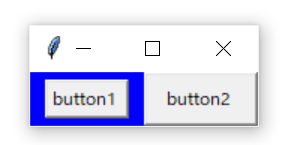

### sticky

(上から右回りに北東南西”NWSE”組み合わせて、NE,SW)に寄せるのか決められる。  
“N　E　W　S　NE　NW　SE　SW”はtkinter で定義されているので、from tkinter import tk のように書いたときは、tk.N,tk.SE　のように記述しないといけない。”N+E”の様に書くことも出来る。(本文では、"from tkinter import *"でtkを省略しています。)


## grid の詳細設定

配置には関係しないが、何か動作したときに表示から消したりするときの方法など、

以下の文中のwはwigetを指します。

### w.grid_info()
 wがどんなものなのか、wの行と列,ipadx,ipady、padx,pady,stickyの値を辞書型のデータで取得できる。(self.B1.grid_info())

### w.grid_forget() (self.B1.info())
 wを表示から消す。.grid()がもう一度読まれると、再び表示されるが、前のrow,columnなどの値はJ保持しない（忘れる）(self.B1.forget())

### w.grid_remove()
 wを表示から消す。.grid()がもう一度よまれると、前のrow,columnの値のまま、前と同じように表示される。(self.B1.grid_remove())

### w.grid_slaves()
 wの中にあるwigetの一覧を取得できる。grid_slaves(row=2),grid_slsves(column=0)の様に指定すれば、その行、列内にあるwiget一覧を取得できる。

### w.columnconfigure(N,opution=value,…), w.rowconfigure(N,opution=value,…)
　N列(行)目に対して、以下に示す設定が出来る。

option一覧

#### minsize
top-lebel-windowを縮小したとき、行(列)の最小の幅をpx値で設定できる。（デフォルト）

#### pad 
行（列）の幅は基本その行(列)内にあるwigetの最大の大きさに依存するが、それに加えて余白を追加できる。(self.columnconfigure(2,pad=10))
pad = [1,10],pad=[3,4,5,4]のように書くと左右と上下、左、上、右、下それぞれ設定できる。

#### weight
行(列)がどの程度top-lebel-windowの大きさ変更に追従するのかを決めれる、（大きさを可変にするには少し書き方の工夫がいる。次項に例を示す。）二つの行に対しこのオプションをつけたとき、1行目には”weight=1”二行目には”weight=2”と書いたとき、余った幅を一行目に3分の1、二行目に3分の2に分配する。このオプションをつけていないものの大きさは変化しない。

## .pack()

基本構文  
w.pack(option=val,...)

option一覧 [[1]](#1)

|option| 説明|
|-|-|
|anchor|	配置可能なスペースに余裕がある場合、Widget をどこに配置するか指定します。デフォルトは Tk.CENTER. stikyと同じものを使える。|
|expand|	親 widget が大きくなったとき、大きくなるかどうかを指定します。 1 を指定すると大きくなり、0 だとなりません。デフォルトは 0|
|fill	|widget が空いているスペースを埋めるかどうか指定します： Tk.NONE, 元のサイズを保持します。 Tk.X, 横に広がります。 Tk.Y, 縦に広がります。 Tk.BOTH, 縦横に広がります。|
|padx	|外側の横の隙間を指定します。|
|pady	|外側の縦の隙間を指定します。|
|ipadx|	内側の横の隙間を指定します。|
|ipady|	内側の縦の隙間を指定します。|
|side	|どの方向からつめていくかを指定します：Tk.TOP (default), 上からつめます。 Tk.LEFT, 左からつめます。Tk.RIGHT, 右からつめます。Tk.BOTTOM, 下からつめます。|

# Style の書き方

## fontset

### 使用できるフォントファミリーの確認

以下のコードを実行したときに表示されるものが使えるフォント一覧です。

In [13]:
import tkinter as tk
import tkinter.font as font

root = tk.Tk()
print(list(font.families()))

['System', '@System', 'Terminal', '@Terminal', 'FixedSys', '@FixedSys', 'Modern', 'Roman', 'Script', 'Courier', 'MS Serif', 'MS Sans Serif', 'Small Fonts', '@Small Fonts', 'Marlett', 'Arial', 'Arabic Transparent', 'Arial Baltic', 'Arial CE', 'Arial CYR', 'Arial Greek', 'Arial TUR', 'Arial Black', 'Bahnschrift Light', 'Bahnschrift SemiLight', 'Bahnschrift', 'Bahnschrift SemiBold', 'Bahnschrift Light SemiCondensed', 'Bahnschrift SemiLight SemiConde', 'Bahnschrift SemiCondensed', 'Bahnschrift SemiBold SemiConden', 'Bahnschrift Light Condensed', 'Bahnschrift SemiLight Condensed', 'Bahnschrift Condensed', 'Bahnschrift SemiBold Condensed', 'Calibri', 'Calibri Light', 'Cambria', 'Cambria Math', 'Candara', 'Candara Light', 'Comic Sans MS', 'Consolas', 'Constantia', 'Corbel', 'Corbel Light', 'Courier New', 'Courier New Baltic', 'Courier New CE', 'Courier New CYR', 'Courier New Greek', 'Courier New TUR', 'Ebrima', 'Franklin Gothic Medium', 'Gabriola', 'Gadugi', 'Georgia', 'Impact', 'Ink Free', '

## フォントの指定方法

In [14]:
root = Tk()

Name_Font = tkinter.font.Font(family = "System",size = 16,weight = tkinter.font.BOLD,slant="italic")
L = Label(root,text = "text",font = Name_Font).grid(row=0,column=0, sticky=E)

root.title("rootwin")

root.mainloop()

## 色の定義

カラーコードで色を設定でき、4ビット8ビット12ビットに対応しています。  
#rgb  
#rrggbb  
#rrrgggbbb  

いくつかの色は、名前でも設定できます。  
  
“black”,”white”,”green”,”blue”,”yellow”,”cyan”,”magenta”,”lightgreen”,etc.  

## tkのStyle 設定

tk(tool kit)のwidgetのスタイルの変更法  
option として設定できる。(htmlと同じ手法)

tkのstyle option一覧（一部のみ、すべてのwidgetが対応しているもの、そのwidget固有の物などがあるため、詳しくは[reference](#reference)を参照してください）

|opttion |説明|
|-|-|
|bg or background      |Normal background color.|
|fg or foreground      |Normal foreground (text) color.|
|font                  |Text font to be used for the button's label.|
|highlightbackground   |Color of the focus highlight when the widget does not have focus.|
|highlightcolor        |The color of the focus highlight when the widget has focus.|
|highlightthickness    |Thickness of the focus highlight.|

例　黒地に白色の文字のテキスト

*2

どちらも可

In [ ]:
        self.sample.Label1 = Label(self.sample,text="white",bg="black",fg="white")
        self.sample.Label1.grid(row=0,column=0)

In [ ]:
        self.sample.Label1 = Label(self.sample,text="white",bg="#000",fg="#fff")
        self.sample.Label1.grid(row=0,column=0)

## ttkのStyle設定

ttk(themed tool kit)のwidgetのスタイルの変更法、  
名前の”theme”とあるように、色やフォントに名前を付けて呼び出すことでスタイルを変更する。（CSSと同じ手法）

styleのoption一覧(一部)

基本構文  
S = ttk.Style()  
S.configure("sefname.TButton",option = val,...)

   w = widget(style = "sefname.TButton")

変数"S"は自由に決める。windowごとにテーマを変えるなら、それぞれのclassのインスタンスとして設定すると扱いやすい。  

S.configre(A.B,option = val)  

A.B　：呼び出すときの名前  
Aは自由に決めることができる。  
Bは旧名、以下の表(『Tkinter 8.5 reference: aGUI for Python』(John W.Shipman)より引用)の対応するものにするとよい。  

(実際対応してなくても問題なかったりする。(FrameのStyleにBtn.TButtonを呼び出しても使える。公式リファレンスでもあまり触れられず、あやふやな定義だったので、深く考えなくてもいいと思います。))


| Widget class | Style name |
|-|-|
| Button | TButton |
| Checkbutton | TCheckbutton |
| Combobox | TCombobox |
| Entry | TEntry |
| Frame | TFrame |
| Label | TLabel |
| LabelFrame | TLabelFrame |
| Menubutton | TMenubutton |
| Notebook | TNotebook |
| PanedWindow | TPanedwindow (not TPanedWindow!) |
| Progressbar| Horizontal.TProgressbar or Vertical.TProgressbar, depending on the orient option. |
| Radiobutton | TRadiobutton |
| Scale | Horizontal.TScale or Vertical.TScale, depending on the orient option. |
| Scrollbar | Horizontal.TScrollbar or Vertical.TScrollbar, dependingon the orient option. |
| Separator| TSeparator |
| Sizegrip | TSizegrip |
| Treeview | Treeview (not TTreview!) |

### styleの検索方法

検索したいWidgetの.winfo_class()を呼び出せばどんなスタイルを設定できるか検索できる。

In [9]:
#例
button = ttk.Button(text = "widgt　Style Serch")
print(button.winfo_class())

TButton


例　黒地に白色の文字のテキスト

*1

In [ ]:
Style = ttk.Style()
Style.configure("ttk.TLabel",background ="black",foreground = "white" )

*2

In [ ]:
        self.sample.Label1 = ttk.Label(self.sample,text="black?",style="ttk.TLabel")
        self.sample.Label1.grid(row=0,column=0)

# 備考

jpyterNoteBook の便利な拡張機能のダウンロード （Anaconda環境の時、ほかの環境は検索してみてください。）  
索引追加などが出来る。  
wasjupyterアップデート https://mebee.info/2020/11/01/post-21852/#outline__3  
nbextensionsのダウンロード　https://qiita.com/shilabo/items/a36c2919bdca2aa97623  
使い方　https://qiita.com/simonritchie/items/d7dccb798f0b9c8b1ec5  

# 参考 引用元

『Tkinter  8.5 reference: a GUI for python』(john W.Shipman 2013/12/31)
<a id='reference'></a>  
https://anzeljg.github.io/rin2/book2/2405/docs/tkinter/index.html

上記referenceの初め数項を簡単に意訳追記したもの　tkinter_reference日本語意訳.docx

[1]「紫藤のページ」  
<a id ='1'></a>
https://www.shido.info/py/tkinter2.html

# python コードで書き出しする時

## 準備

ｔｋはpythonの標準ライブラリなので、サンプルのまま利用するときは、特に新しくインポートするものはありません。

## はじめの行に付け足す。(詳しくは"Shebang"(シバン)で検索すると出てきます。)

### Utf－8で読み込むようにする。

In [ ]:
# -*- coding:utf-8 -*-

### 実行する環境指定.

(aaa という仮想環境で実行しようとするとき)

環境指定方法

aaaと言う名前の仮想環境でpython3 で実行するときの例、  
以下のように書くとどのディレクトリで開いて実行しても、  
source aaa/bin/activate で仮想環境に入り、  
そこで python3 ○○.py で実行したときとどうように実行できる。

In [ ]:
#!/user/aaa/bin/env python3 

### 実行するpythonのバージョン指定方法

In [ ]:
#!python3.7 # 使用したいpython のバージョン

## 最後の3行を書き換える

In [ ]:
if __name__ == "__main__":
    _app = _MainFrame()
    _app.master.title(_app.name)
    _app.mainloop()

## 記述例

In [ ]:
# -*- coding:utf-8 -*-
# python

#main_code 
from tkinter import *
from tkinter import ttk
import tkinter.font


#Style_Setting=======================================
Style = ttk.Style()
Style.configure("M1.TFrame",background = "#6ac9f4")
Style.configure("User.TFrame",background = "#c7f9fd")
Style.configure("UseFrame.TLabelframe",background = "#fff")#親要素
Style.configure("UseFrame.TLabelframe.Label",background="#fff",foreground="#000")#子要素
Style.configure("FS4.TFrame",background = "#ebebeb")

Style.configure("ttkS.TLabel",background ="black",foreground = "white" )
#====================================================
class _MainFrame(Frame):
    def __init__(self,master=None):
        Frame.__init__(self,master)
        
        self.master.minsize(width = 320,height = 180)
        self.grid(sticky=N+S+E+W)
        self.name = StringVar()
        
        self.name = "GUI"#windowの名前
        #instances=====================================
        #==============================================
        self._MainSet()
        self._SetWidgets()
        
    def _SetWidgets(self):
        #define_widgets=========================================
        self._MakeFrame("sample")
        self.sample.Button1 = Button(self.sample,text="test",command=test)
        self.sample.Button1.grid(row=0,column=0)
        #=======================================================
    def _MainSet(self):
        Top=self.winfo_toplevel()
        Top.configure(bg="")
        Top.grid_columnconfigure(0,weight=1)
        Top.grid_rowconfigure(2,weight=1)
        self.H1 = ttk.Frame(Top,padding=4)
        self.H1.grid(row=0,sticky=N+E+W+S)
        
        self.H1.grid_columnconfigure(0, weight=0)
        self.H1.grid_columnconfigure(1, weight=1)
        self.H1.grid_columnconfigure(2, weight=0)
        
        Name_Font = tkinter.font.Font(family = "Menlo",size = 16,weight = tkinter.font.BOLD)
        self.H1.Name = Label(self.H1,text = self.name,font = Name_Font).grid(row=0,column=0, sticky=E)
        self.H1.Text = Label(self.H1,text = "label",font = tkinter.font.Font(size = 10)).grid(row=0,column=1, sticky=W)
        self.H1.Quitbutton = Button(self.H1,text="Quit",command = self.quit).grid(row=0,column=2, sticky=W)
        
        self.M1 = ttk.Frame(Top,style = "M1.TFrame")
        self.M1.grid(row = 1,sticky=N+E+W+S)
        self.M1.count = 0
        
        self.UserFrame = ttk.Frame(Top,padding = [5,0],style ="User.TFrame" )
        self.UserFrame.grid(row = 2,column = 0,sticky = N+E+W+S)
        self.UserFrame.grid_rowconfigure(0, weight=1)
        self.UserFrame.grid_columnconfigure(0, weight=1)

    def _MakeFrame(self,name):
        self._OffPalse()
        code0 = "self."+ name + "= ttk.LabelFrame(self.UserFrame,style=\"UseFrame.TLabelframe\",text=\""+name+"\",padding=[0,5],relief=\"flat\")"
        code1 = "self."+ name + ".grid(row=0,column=0,sticky = N+E+W+S)"
        exec(code0)
        exec(code1)
        self._M1button(name)
    def _M1button(self,Frame):
        code0 = "self.M1."+Frame+"=Button(self.M1,text="+"\""+Frame+"\",command = self._combineFunc(self._OffPalse,self."+Frame+".grid))"
        code1 = "self.M1."+Frame+".grid(row = 0,column="+str(self.M1.count)+")"
        code2 = "self.M1."+Frame+".column="+str(self.M1.count)
        code3 = "self.M1."+Frame+".state=\"Appear\""
        code4 = "self.M1."+Frame+".freame=\"self.UserFrame."+Frame+"\""
        exec(code0)
        exec(code1)
        exec(code2)
        exec(code3)
        exec(code4)
        self.M1.count += 1
    def _OffPalse(self):
        widgetlist = self.UserFrame.grid_slaves()
        for wid in widgetlist:
            wid.grid_remove()
    def _combineFunc(self, *funcs):
       def combinedFunc(*args, **kwargs):
            for f in funcs:
                f(*args, **kwargs)
       return combinedFunc
    #User_commands1===================================

    #================================================


#User_commands2===================================
def test():
    print("test")
#================================================



if __name__ = "__main__":
    _app = _MainFrame()
    _app.master.title(_app.name)
    _app.mainloop()

# 実装例いろいろ

## png を読み込んでボタンに表示する。

In [2]:
import tkinter as tk
from tkinter import ttk
from tkinter.messagebox import showinfo


# root window
root = tk.Tk()
root.geometry('300x200')
root.resizable(False, False)
root.title('Image Button Demo')


# download button
def download_clicked():
    showinfo(
        title='Information',
        message='Download button clicked!'
    )


download_icon = tk.PhotoImage(file='./assets/download.png')##挿入したい画像のパス
download_button = ttk.Button(
    root,
    image=download_icon,
    command=download_clicked
)

download_button.pack(
    ipadx=5,
    ipady=5,
    expand=True
)


root.mainloop()

SyntaxError: invalid character in identifier (<ipython-input-2-f7ad811dc1ec>, line 1)

ダブルクリック

In [1]:
import tkinter as tk
import random
def fill_box(event):
    """Clear and refresh listbox"""
    try:
        listbox.get(listbox.curselection()[0])
        selection = True
    except IndexError:
        selection = False
    print("Event:", event, "Selection:", selection)
    listbox.delete(0, tk.END)
    for _ in range(10):
        listbox.insert(tk.END, random.randint(0, 1000))
root = tk.Tk()
listbox = tk.Listbox(root)
for _ in range(10):
    listbox.insert(tk.END, random.randint(0, 1000))
listbox.bind("<Double-Button-1>", fill_box)
# listbox.bind("<Triple-Button-1>", lambda x: 1)  # Triple click
listbox.pack()
root.mainloop()

Event: <ButtonPress event num=1 x=27 y=65> Selection: True
Event: <ButtonPress event num=1 x=22 y=54> Selection: True
Event: <ButtonPress event num=1 x=13 y=51> Selection: True
Event: <ButtonPress event num=1 x=13 y=47> Selection: False
Event: <ButtonPress event num=1 x=13 y=47> Selection: False
Event: <ButtonPress event num=1 x=13 y=47> Selection: False
Event: <ButtonPress event num=1 x=13 y=47> Selection: False
Event: <ButtonPress event num=1 x=13 y=47> Selection: False
Event: <ButtonPress event num=1 x=13 y=47> Selection: False
Event: <ButtonPress event num=1 x=13 y=47> Selection: False
Event: <ButtonPress event num=1 x=13 y=47> Selection: False
Event: <ButtonPress event num=1 x=11 y=43> Selection: False
Event: <ButtonPress event num=1 x=11 y=43> Selection: False
Event: <ButtonPress event num=1 x=11 y=43> Selection: True
Event: <ButtonPress event num=1 x=9 y=86> Selection: True
Event: <ButtonPress event num=1 x=11 y=36> Selection: True
Event: <ButtonPress event num=1 x=11 y=8> Selec